# Data Wrangle

##### Dataset: <a href='https://www.kaggle.com/competitions/quora-question-pairs/data'>Quora Question Pairs</a>

### Table of Contents
<ul>
    <li><a href="#start">Let's get started</a></li>
    <li><a href="#gather">Gather</a></li>
    <li><a href="#asses">Asses</a></li>
    <li><a href="#clean">Clean</a></li>
    <li><a href="#dataset">Save Dataset</a></li>
</ul>

# 

<a id='start'></a>
### Let's get started

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

<a id='gather'></a>
### Gather

In [2]:
df = pd.read_csv(os.path.join('data', 'train.csv'))
df.shape

(404290, 6)

<a id="asses"></a>
## Asses

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


##### Let's check existence of null value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

NOTE:
- question1 has 1 rows with null value
- question2 has 2 rows with null value

##### Let's explore data duplication

In [6]:
df.duplicated().sum()

0

No duplicate rows found

In [7]:
# Repeated questions
que_ids = np.array(df['qid1'].tolist() + df['qid2'].tolist())
unique_que_ids, que_id_counts = np.unique(que_ids, return_counts=True)
print('Number of unique questions: {}'.format(len(unique_que_ids)))
print('Number of questions that appear multiple times: {}'.format(np.sum(que_id_counts > 1)))

Number of unique questions: 537933
Number of questions that appear multiple times: 111780


- 537933 unique question has been used and 111780 words has been appeared multiple times.
- Duplicate combination is not present. So, the data looks good.

Text(0, 0.5, 'Number of questions')

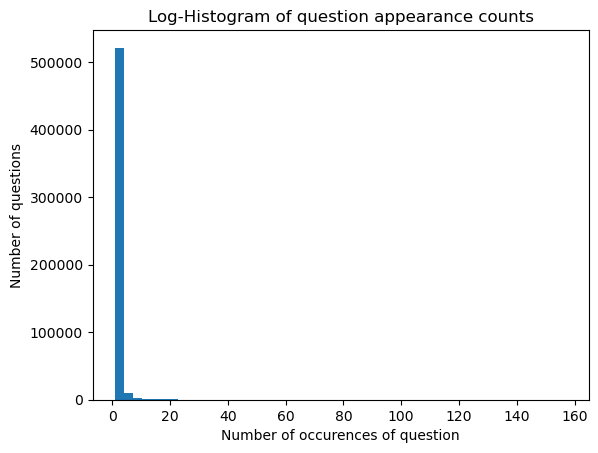

In [8]:
plt.hist(que_id_counts, bins=50)
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')

- Questions with multiple appearances has lesser questions as the number of appearances increases. 

<AxesSubplot: >

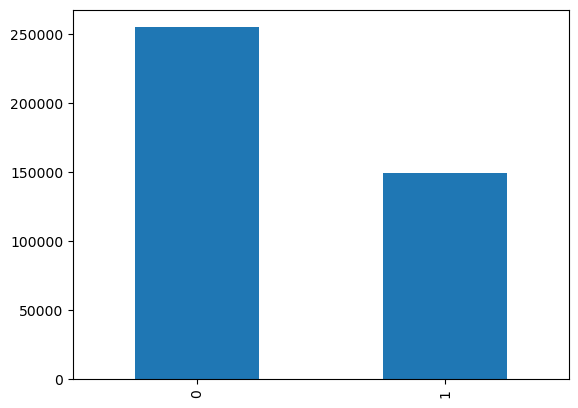

In [9]:
df['is_duplicate'].value_counts().plot(kind='bar')

- Dataset is not balanced

<a id='clean'></a>
### Clean

- question1 has 1 rows with null value
- question2 has 2 rows with null value

In [10]:
# drop the rows with missing values
df = df.dropna()

df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

- The dataset is cleaned

<a id='dataset'></a>
### Save dataset

In [11]:
df.to_csv(os.path.join('data', 'preprocessed', 'train.csv'))